1. Pandas DataFrame
1. Create a Pandas DataFrame reading N rows of the data/data_000637.txt dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k (check the documentation).

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('data/data_000637.txt', skiprows=0, nrows= 15000)
print(data)
print(data.info())


       HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS
0         1     0          123  3869200167        2374        26
1         1     0          124  3869200167        2374        27
2         1     0           63  3869200167        2553        28
3         1     0           64  3869200167        2558        19
4         1     0           64  3869200167        2760        25
...     ...   ...          ...         ...         ...       ...
14995     1     1            4  3869200316        3399         9
14996     1     1           17  3869200316        3400        15
14997     1     1           10  3869200316        3530        16
14998     1     1            8  3869200316        3533        18
14999     1     0          139  3869200316        3539         0

[15000 rows x 6 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   H

2. Estimate the number of BX in a ORBIT (the value x).

In [5]:

bx=data['BX_COUNTER']
estimated_bx = max(bx) +1
print("Estimated number of BX in a ORBIT:", estimated_bx)

Estimated number of BX in a ORBIT: 3564


3. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information) since the beginning of the data acquisition, and convert the new column to a Time Series.

In [6]:
data["abs_time"] = data['TDC_MEAS'] *(25 / 30) + data['BX_COUNTER'] * 25 +data['ORBIT_CNT']*estimated_bx*25
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,abs_time
0,1,0,123,3869200167,2374,26,3.447457e+14
1,1,0,124,3869200167,2374,27,3.447457e+14
2,1,0,63,3869200167,2553,28,3.447457e+14
3,1,0,64,3869200167,2558,19,3.447457e+14
4,1,0,64,3869200167,2760,25,3.447457e+14
...,...,...,...,...,...,...,...
14995,1,1,4,3869200316,3399,9,3.447457e+14
14996,1,1,17,3869200316,3400,15,3.447457e+14
14997,1,1,10,3869200316,3530,16,3.447457e+14
14998,1,1,8,3869200316,3533,18,3.447457e+14


4. Find out the duration of the data taking in hours, minutes and seconds, by using the features of the Time Series. Perform this check reading the whole dataset.

In [11]:
import datetime as dt

stime = dt.datetime.now()
print("start:", stime)


time =  data['TDC_MEAS'] *(25/30) + data['BX_COUNTER'] * 25 + data['ORBIT_CNT']*estimated_bx*25

etime = dt.datetime.now()
print("End:", etime)
print("Time passed:", (etime - stime))


start: 2022-12-02 18:55:48.441291
End: 2022-12-02 18:55:48.448311
Time passed: 0:00:00.007020


5. Use the .groupby() method to find out the noisy channels, i.e. the TDC channels with most counts (print to screen the top 3 and the corresponding counts)

In [12]:
groupby_Channel= data.groupby('TDC_CHANNEL').sum().sort_values(by=['HEAD']).iloc[-3:]
print("3 noisy Channels: \n", groupby_Channel, '\n')

3 noisy Channels: 
              HEAD  FPGA      ORBIT_CNT  BX_COUNTER  TDC_MEAS      abs_time
TDC_CHANNEL                                                               
63            749     6  2898030982000     1364359     11085  2.582146e+17
64            752    17  2909638583165     1394717     10889  2.592488e+17
139          1268   389  4906145905369     2247027         0  4.371376e+17 



6. Count the number of non-empty orbits (i.e. the number of orbits with at least one hit).

In [14]:
nonemptyOrbit = data[data['ORBIT_CNT']>0].count()
print("count of non empty orbit: ", nonemptyOrbit['ORBIT_CNT'], '\n')


count of non empty orbit:  15000 



7. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139.

In [15]:
tdc = data[data['TDC_CHANNEL'] == 139]
print(tdc)
noofunitOrbit= tdc['ORBIT_CNT'].nunique()
print("count of unique orbit: ", noofunitOrbit, '\n')

       HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS      abs_time
7         1     0          139  3869200167        2776         0  3.447457e+14
15        1     1          139  3869200167        2797         0  3.447457e+14
30        1     0          139  3869200167        3085         0  3.447457e+14
39        1     0          139  3869200167        3186         0  3.447457e+14
48        1     0          139  3869200168          23         0  3.447457e+14
...     ...   ...          ...         ...         ...       ...           ...
14956     1     0          139  3869200316         285         0  3.447457e+14
14970     1     0          139  3869200316        1001         0  3.447457e+14
14985     1     0          139  3869200316        3389         0  3.447457e+14
14989     1     1          139  3869200316        3398         0  3.447457e+14
14999     1     0          139  3869200316        3539         0  3.447457e+14

[1268 rows x 7 columns]
count of unique orbit:  150

8. Create two Series (one for each FPGA) that have the TDC channel as index, and the number of counts for the corresponding TDC channel as values.

In [9]:
FPGA0= data[data['FPGA']==0]
FPGA1= data[data['FPGA']==1]
FPGA0_TDC_Count = FPGA0['TDC_CHANNEL'].value_counts()
FPGA1_TDC_Count = FPGA1['TDC_CHANNEL'].value_counts()
print('FPGA 0 TDC_CHANNEL count: \n', FPGA0_TDC_Count)
print('FPGA 1 TDC_CHANNEL count: \n', FPGA1_TDC_Count)

FPGA 0 TDC_CHANNEL count: 
 139    879
63     743
64     735
61     555
62     529
      ... 
99       5
107      5
98       5
106      4
101      3
Name: TDC_CHANNEL, Length: 117, dtype: int64
FPGA 1 TDC_CHANNEL count: 
 139    389
2      363
1      338
4      290
3      277
      ... 
91       1
78       1
93       1
75       1
76       1
Name: TDC_CHANNEL, Length: 124, dtype: int64


9. Optional: Create two histograms (one for each FPGA) that show the number of counts for each TDC channel.



<AxesSubplot: title={'center': 'FPGA 0'}, xlabel='TDC_CHANNEL'>

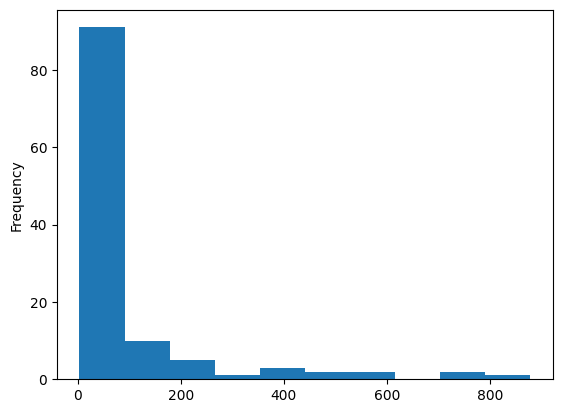

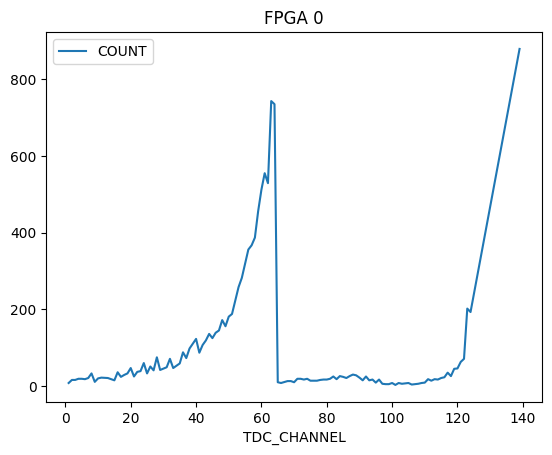

In [10]:
ax = FPGA0_TDC_Count.plot.hist()
fpga_0 = data[data['FPGA']== 0].groupby('TDC_CHANNEL').size().reset_index(name='COUNT')
fpga_0.plot(x = 'TDC_CHANNEL', y = 'COUNT', title = "FPGA 0")